In [24]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from mlxtend.plotting import plot_decision_regions 
from sklearn.tree import DecisionTreeClassifier

In [25]:
df=pd.DataFrame()

In [74]:
df['x1']=[1,2,5,4,5,6,5,8,9,7]
df['x2']=[9,8,4,6,9,8,1,3,2,7]
df['label']=[1,0,1,0,0,0,1,1,0,0]

In [75]:
df

,x1,x2,label,weight,y_pred
0,1,9,1,0.1,1
1,2,8,0,0.1,0
2,5,4,1,0.1,1
3,4,6,0,0.1,0
4,5,9,0,0.1,0
5,6,8,0,0.1,0
6,5,1,1,0.1,1
7,8,3,1,0.1,1
8,9,2,0,0.1,1
9,7,7,0,0.1,0


<Axes: xlabel='x1', ylabel='x2'>

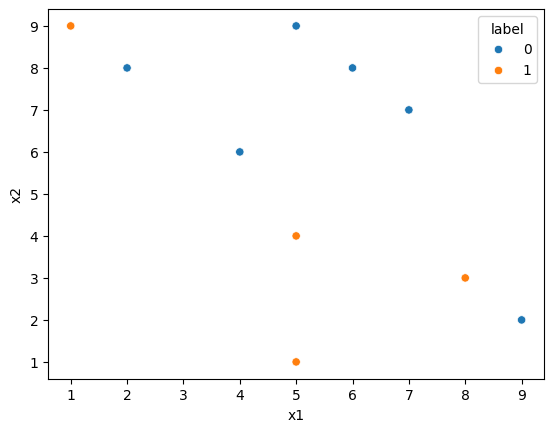

In [76]:
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['label'])

In [77]:
# Step1- Assign weight to each rows(must be equal )

# formula: each weight= 1/total no of rows 

df['weight']=1/df.shape[0]

In [78]:
df

,x1,x2,label,weight,y_pred
0,1,9,1,0.1,1
1,2,8,0,0.1,0
2,5,4,1,0.1,1
3,4,6,0,0.1,0
4,5,9,0,0.1,0
5,6,8,0,0.1,0
6,5,1,1,0.1,1
7,8,3,1,0.1,1
8,9,2,0,0.1,1
9,7,7,0,0.1,0


In [79]:
dtc= DecisionTreeClassifier(max_depth=1)

x=df.iloc[:,:2]
y=df.iloc[:,2]


In [80]:
dtc.fit(x,y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.5, 0.75, 'x[1] <= 5.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.625, 0.5, '  False')]

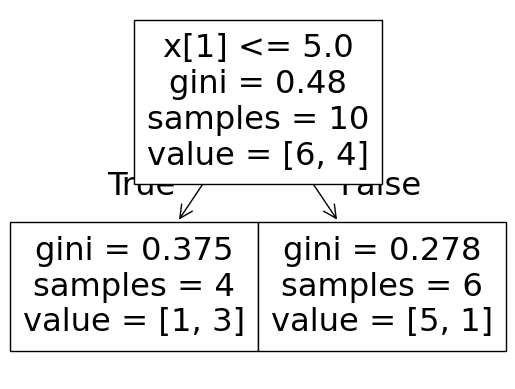

In [81]:
from sklearn.tree import plot_tree
plot_tree(dtc)

In [82]:
X = x.values        # convert to numpy
Y = y.values.ravel()

C:\Users\Mustafa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

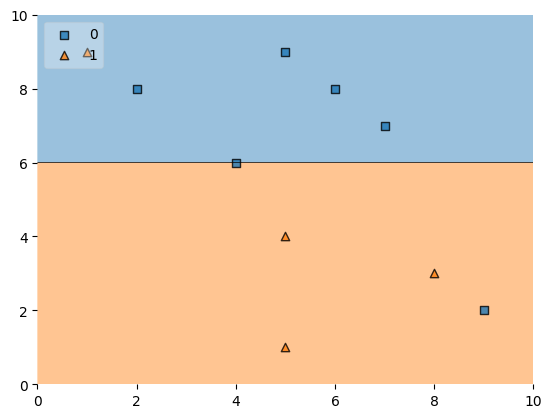

In [83]:
plot_decision_regions(X, Y, clf=dtc, legend=2)

In [84]:
# prediction on training data 

df['y_pred']=dtc.predict(x)

In [86]:
df

,x1,x2,label,weight,y_pred
0,1,9,1,0.1,0
1,2,8,0,0.1,0
2,5,4,1,0.1,1
3,4,6,0,0.1,0
4,5,9,0,0.1,0
5,6,8,0,0.1,0
6,5,1,1,0.1,1
7,8,3,1,0.1,1
8,9,2,0,0.1,1
9,7,7,0,0.1,0


In [87]:
# To calculate the weightage or alpha of a Decision stump : alpha=0.5 * np.log((1 - error) / error)
# where error is = 0.2 (because there is  two  misclassified point , if 3 misclassified point then error is 0.1+0.1+0.1=0.3)

In [102]:
def calculate_model_weight(error):
    return 0.5 * np.log((1 - error) / error)

In [103]:
alpha1= calculate_model_weight(0.2)

In [104]:
alpha1

0.6931471805599453

In [112]:
# we will increase the weightage of the misclassified points
# Update weight 

def update_row_weight(row,alpha=0.69314718):
    if row['label']==row ['y_pred']: 
        return row['weight']*np.exp(-alpha)

    else: 
        return row['weight']*np.exp(alpha)
    


In [113]:
df['updated_weights']=df.apply(update_row_weight,axis=1)

In [114]:
df

,x1,x2,label,weight,y_pred,updated_weights
0,1,9,1,0.1,0,0.20
1,2,8,0,0.1,0,0.05
2,5,4,1,0.1,1,0.05
3,4,6,0,0.1,0,0.05
4,5,9,0,0.1,0,0.05
5,6,8,0,0.1,0,0.05
6,5,1,1,0.1,1,0.05
7,8,3,1,0.1,1,0.05
8,9,2,0,0.1,1,0.20
9,7,7,0,0.1,0,0.05


In [115]:
df['updated_weights'].sum()

0.8000000000000003

In [117]:
df['normalized_weight']=df['updated_weights']/df['updated_weights'].sum()

In [119]:
df['normalized_weight'].sum()

0.9999999999999998

In [120]:
df

,x1,x2,label,weight,y_pred,updated_weights,normalized_weight
0,1,9,1,0.1,0,0.20,0.2500
1,2,8,0,0.1,0,0.05,0.0625
2,5,4,1,0.1,1,0.05,0.0625
3,4,6,0,0.1,0,0.05,0.0625
4,5,9,0,0.1,0,0.05,0.0625
5,6,8,0,0.1,0,0.05,0.0625
6,5,1,1,0.1,1,0.05,0.0625
7,8,3,1,0.1,1,0.05,0.0625
8,9,2,0,0.1,1,0.20,0.2500
9,7,7,0,0.1,0,0.05,0.0625


In [135]:
# 1) ensure updated_weights exist and normalize them (sum -> 1)
df['normalized_weight'] = df['updated_weights'] / df['updated_weights'].sum()

# quick sanity check
print("sum normalized_weight:", df['normalized_weight'].sum())

# 2) create cumulative intervals for sampling
df['cumsum_upper'] = df['normalized_weight'].cumsum()
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weight']

# 3) view the relevant columns
df[['x1','x2','label','weight','y_pred','updated_weights','normalized_weight','cumsum_lower','cumsum_upper']]


sum normalized_weight: 0.9999999999999998


,x1,x2,label,weight,y_pred,updated_weights,normalized_weight,cumsum_lower,cumsum_upper
0,1,9,1,0.1,0,0.20,0.2500,0.0000,0.2500
1,2,8,0,0.1,0,0.05,0.0625,0.2500,0.3125
2,5,4,1,0.1,1,0.05,0.0625,0.3125,0.3750
3,4,6,0,0.1,0,0.05,0.0625,0.3750,0.4375
4,5,9,0,0.1,0,0.05,0.0625,0.4375,0.5000
5,6,8,0,0.1,0,0.05,0.0625,0.5000,0.5625
6,5,1,1,0.1,1,0.05,0.0625,0.5625,0.6250
7,8,3,1,0.1,1,0.05,0.0625,0.6250,0.6875
8,9,2,0,0.1,1,0.20,0.2500,0.6875,0.9375
9,7,7,0,0.1,0,0.05,0.0625,0.9375,1.0000


In [136]:
def create_new_dataset(df):

    indices = []

    for i in range(df.shape[0]):  
        a = np.random.random()  

        for index, row in df.iterrows():

            # choose the row whose weight interval contains 'a'
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
                break    # IMPORTANT — stop after finding the match

    return indices


In [137]:
index_values=create_new_dataset(df)

In [138]:
index_values

[8, 4, 0, 3, 0, 2, 1, 0, 0, 8]

In [140]:
second_df=df.iloc[index_values,[0,1,2,3]]

In [141]:
second_df

,x1,x2,label,weight
8,9,2,0,0.1
4,5,9,0,0.1
0,1,9,1,0.1
3,4,6,0,0.1
0,1,9,1,0.1
2,5,4,1,0.1
1,2,8,0,0.1
0,1,9,1,0.1
0,1,9,1,0.1
8,9,2,0,0.1


In [142]:
dtc2=DecisionTreeClassifier(max_depth=1)

X=second_df.iloc[:,0:2].values 
y=second_df.iloc[:,2].values

In [143]:
dtc2.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.5, 0.75, 'x[0] <= 1.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.625, 0.5, '  False')]

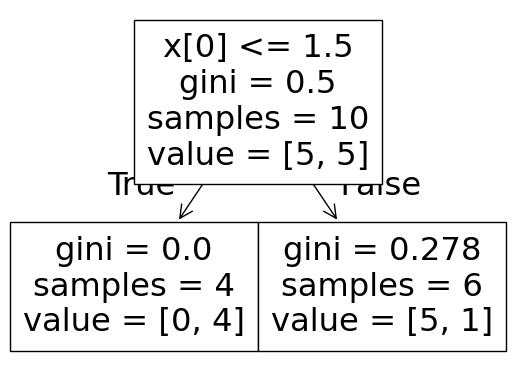

In [144]:
plot_tree(dtc2)

<Axes: >

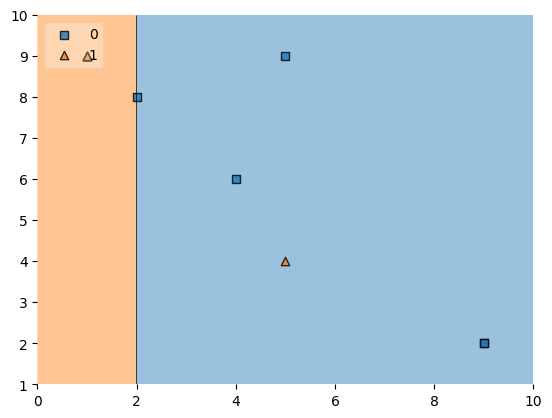

In [145]:
plot_decision_regions(X,y,clf=dtc2,legend=2)